In [334]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 

sns.set()


In [335]:
file = 'Resource/Intoxication Data_2019_v3.csv'

In [336]:
## Import our data into pandas from CSV
df1= pd.read_csv(file)
df1.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,190325212,2019-11-23,1315.0,3,Southwest,328,21,F,W,17.0,Liquor Laws,I,25620BP,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,28TH ST,E UNIVERSITY,"(34.0278, -118.281)"
1,5809994,2019-11-27,2100.0,18,Southeast,1801,20,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,FIGUEROA,MANCHESTER,"(33.9601, -118.2827)"
2,190818921,2019-11-27,1645.0,8,West LA,893,42,M,W,18.0,Drunkeness,M,41.27CLAMC,DRINKING IN PUBLIC,SEPULVEDA BL,PEARL,"(34.0344, -118.4336)"
3,5672540,2019-11-24,356.0,15,N Hollywood,1547,30,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,BURBANK,HOLLYWOOD FY,"(34.1673, -118.3816)"
4,5806232,2019-11-23,149.0,2,Rampart,239,25,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,WESTERN AV,101 SOUTHBOUND,"(34.0609, -118.2535)"


In [337]:
data = df1.isnull().sum() / len(df1)
data

Report ID                   0.000000
Arrest Date                 0.000000
Time                        0.000068
Area ID                     0.000000
Area Name                   0.000000
Reporting District          0.000000
Age                         0.000000
Sex Code                    0.000000
Descent Code                0.000000
Charge Group Code           0.000000
Charge Group Description    0.000000
Arrest Type Code            0.000000
Charge                      0.000000
Charge Description          0.000000
Address                     0.000000
Cross Street                0.210748
Location                    0.000000
dtype: float64

In [338]:
df1[['Time']].isnull().sum() / len(df1)

Time    0.000068
dtype: float64

In [339]:
#filter by DRUNK DRIVING ALCOHOL/DRUGS
drunks = df1[df1['Charge Description'] == 'DRUNK DRIVING ALCOHOL/DRUGS']
drunks.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1,5809994,2019-11-27,2100.0,18,Southeast,1801,20,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,FIGUEROA,MANCHESTER,"(33.9601, -118.2827)"
3,5672540,2019-11-24,356.0,15,N Hollywood,1547,30,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,BURBANK,HOLLYWOOD FY,"(34.1673, -118.3816)"
4,5806232,2019-11-23,149.0,2,Rampart,239,25,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,WESTERN AV,101 SOUTHBOUND,"(34.0609, -118.2535)"
26,191008773,2019-04-20,1830.0,10,West Valley,1049,28,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,BURBANK BL,WOODLEY AV,"(34.1717, -118.4757)"
43,5583360,2019-03-26,2345.0,17,Devonshire,1792,35,M,H,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,PARTHENIA,CORBIN,"(34.2282, -118.5623)"


In [340]:
#calculate of the count of male and female

male=len(df1[df1['Sex Code'] == 'M']) / len(df1)

male*100

83.7902021983987

In [341]:
female=len(df1[df1['Sex Code'] == 'F']) / len(df1)
female*100

16.209797801601304

Text(189.75, 0.5, 'Count')

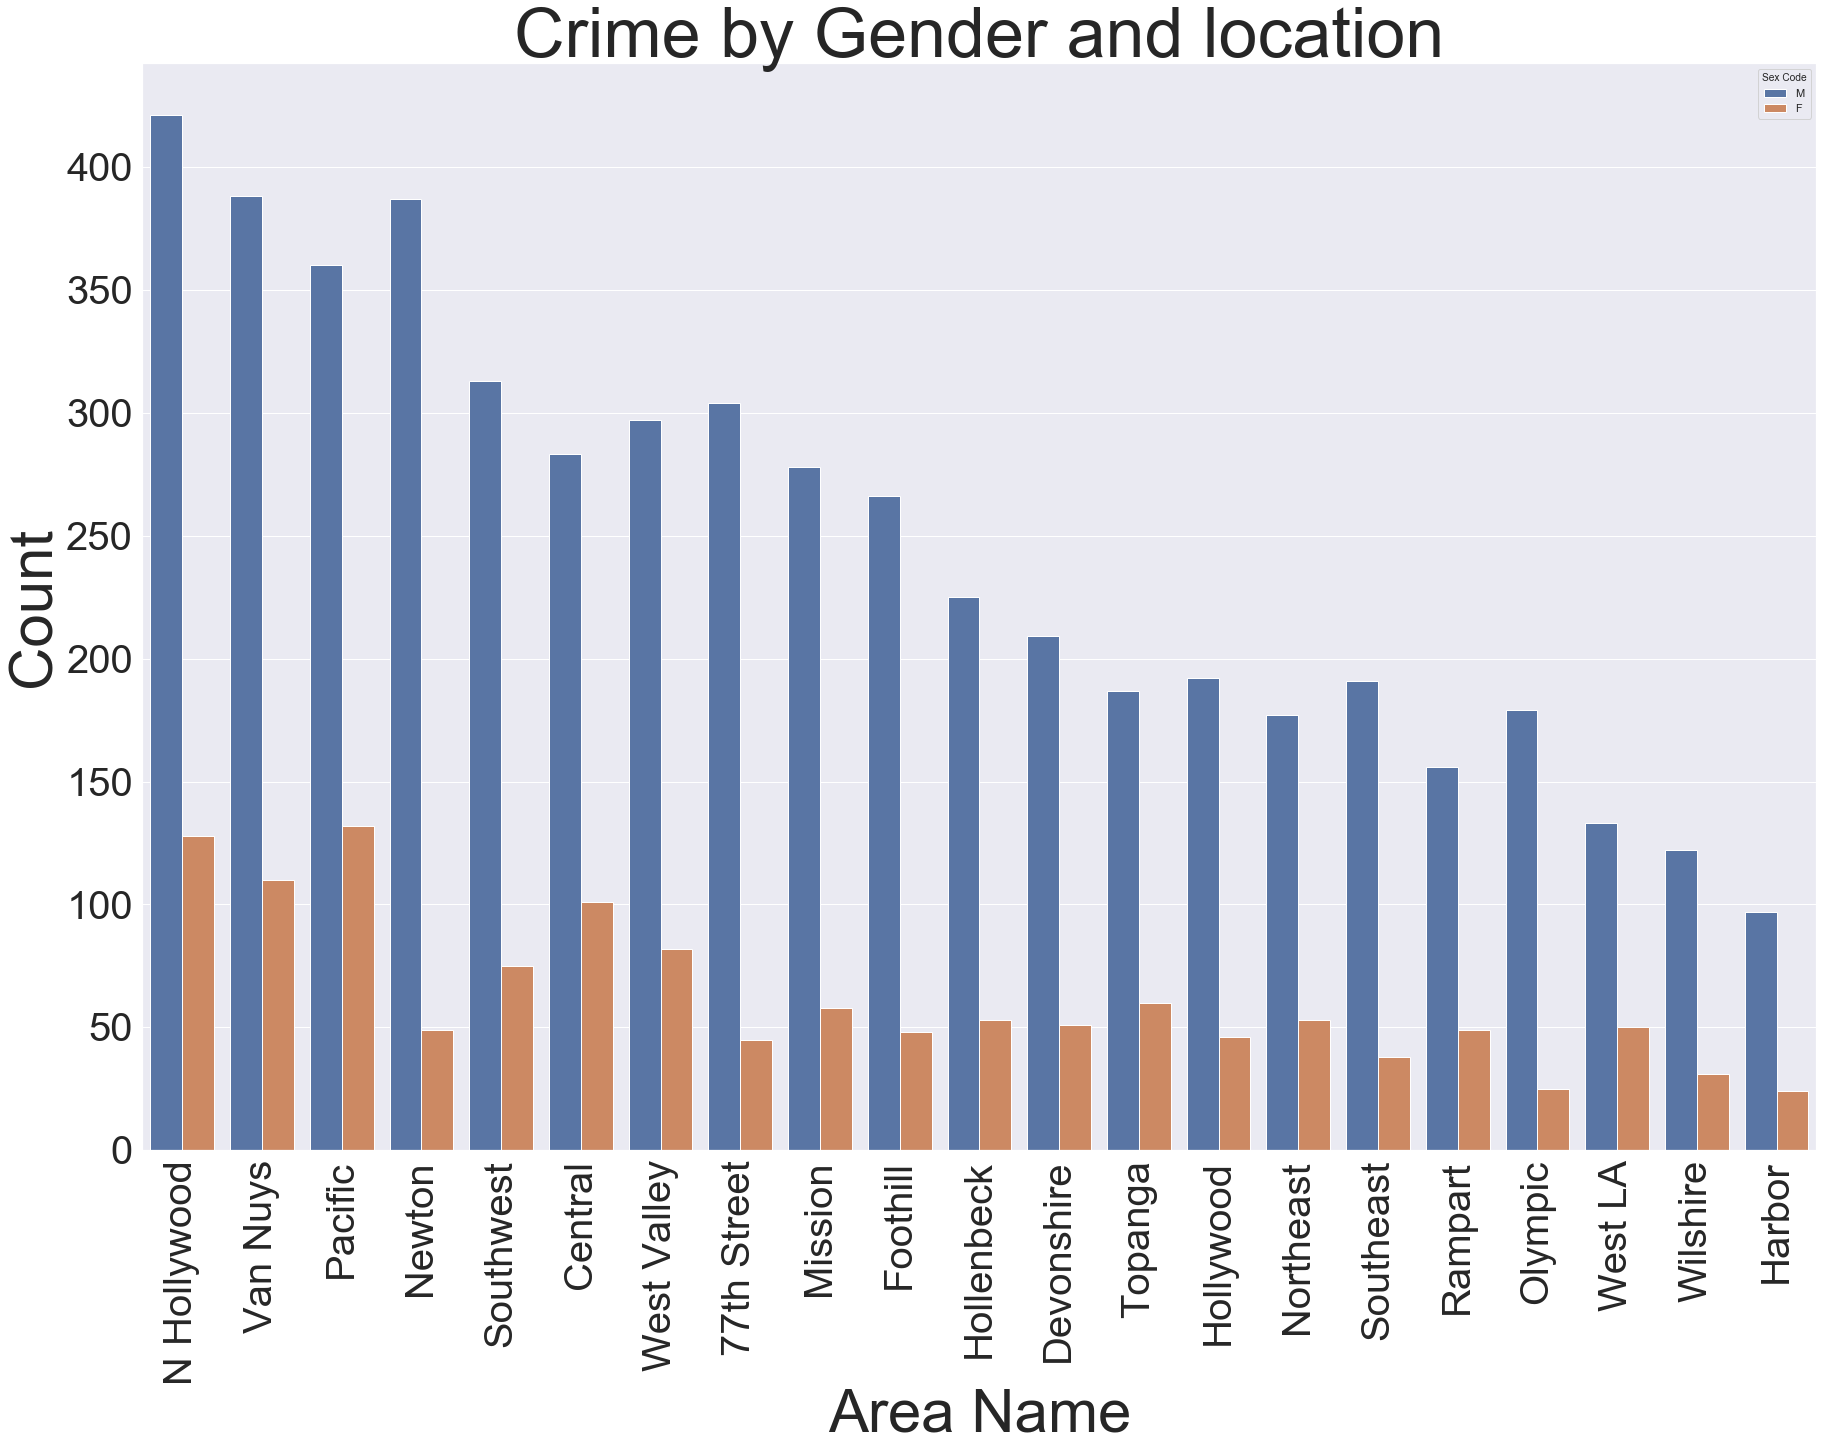

In [342]:

plt.figure(figsize=(30,20))

sns.countplot(x=drunks['Area Name'],order=drunks['Area Name'].value_counts().index, hue=drunks['Sex Code']).set_title("Crime by Gender and location", fontsize=70)

plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.savefig("Crime by Gender and location.png",bbox_inches='tight')
plt.xlabel('Area Name',fontsize=60)
plt.ylabel('Count',fontsize=60)



Text(0.5, 156.5, 'count')

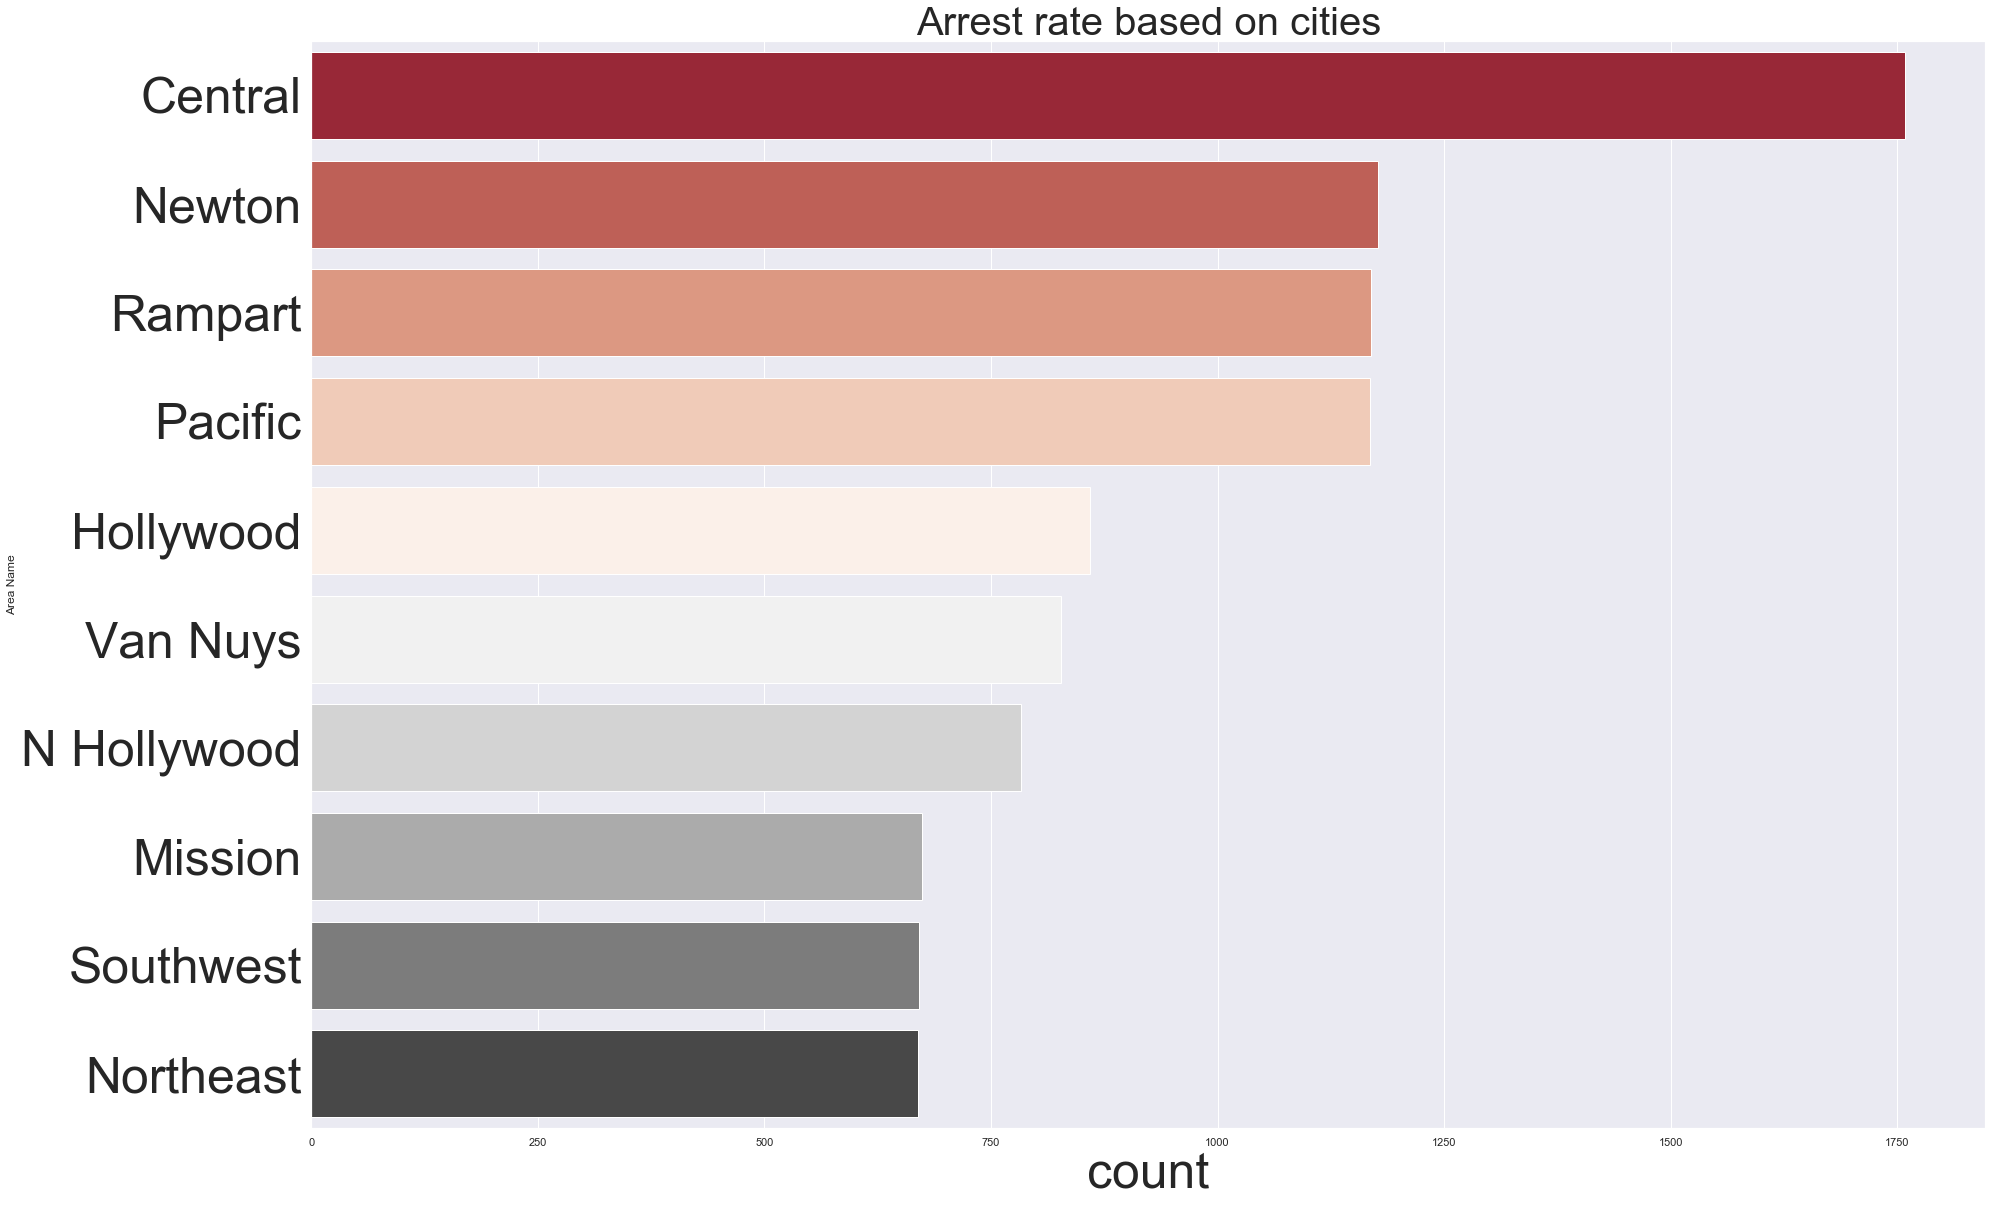

In [343]:
plt.figure(figsize=(30,20))

plt.yticks(fontsize=50)
sns.countplot(y=df1['Area Name'],order=df1['Area Name'].value_counts().index[:10], palette='RdGy').set_title("Arrest rate based on cities", fontsize=40)
plt.savefig("Crime Base on Area Name",bbox_inches='tight')
plt.xlabel('count',fontsize=50)

In [344]:
#calculate DRUNK_DRIVING_ALCOHOL amount
DRUNK_DRIVING_ALCOHOL= len(df1[df1['Charge Description'] == 'DRUNK DRIVING ALCOHOL/DRUGS']) / len(df1)
DRUNK_DRIVING_ALCOHOL*100

43.92047767675397

In [345]:
#calculate DRINKING_IN_PUBLIC amount
DRINKING_IN_PUBLIC = (len(df1[df1['Charge Description'] == 'DRINKING IN PUBLIC']) / len(df1))
DRINKING_IN_PUBLIC*100

15.280227982087121

In [346]:
df1['Charge Description'].unique()

array(['OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE',
       'DRUNK DRIVING ALCOHOL/DRUGS', 'DRINKING IN PUBLIC',
       'DRINKING ALCOHOL', 'SALE/ETC OF ALCOHOLIC BEVERAGE TO MINOR',
       'MINOR POSSESS ALCOHOL', 'DUI ALCOHOL CAUSING INJURY',
       'DRUNK DRIVING .10 OR ABOVE',
       'BRING/SEND NARC/CONT SUBS/ALCOHOL TO JAIL',
       'DISORD CONDUCT:UI/DRUG, ALCOHOL', 'DUI W/PRIOR SPEC CONVICTIONS',
       'DUI OF ANY DRUG', 'DUI .08 ALCOHOL CAUSING INJURY',
       'DUI ALCOHOL/DRUGS ON BICYCLE', 'DUI ALCOHOL/DRUG W/PRIORS',
       'DUI OF ALCOHOL & DRUG', 'POSS DRUGS/ALCOHOLIC BEV:PRISON/JAIL',
       'MINOR DRIVE W/BLOOD ALCOHOL OF 0.05%+',
       'SELL/LET MINOR CONSUME ALCOHOL',
       'ALCOHOLIC BEV LICENSEE POSS UNAUTH LIQ',
       'MINOR IN POSSESSION OF ALCOHOLIC BEVERAGE',
       'DRUNK DRIVING ADDICT DRIVE VEHICLE',
       'DUI OF A DRUG CAUSING INJURY',
       'POSS NARC/DRUG/ALCOHOL/DRUG PARAPH:JAIL',
       'ALCOHOLIC BEV SALES TO INTOXICATED PERSNS',
       'DUI OF COMB

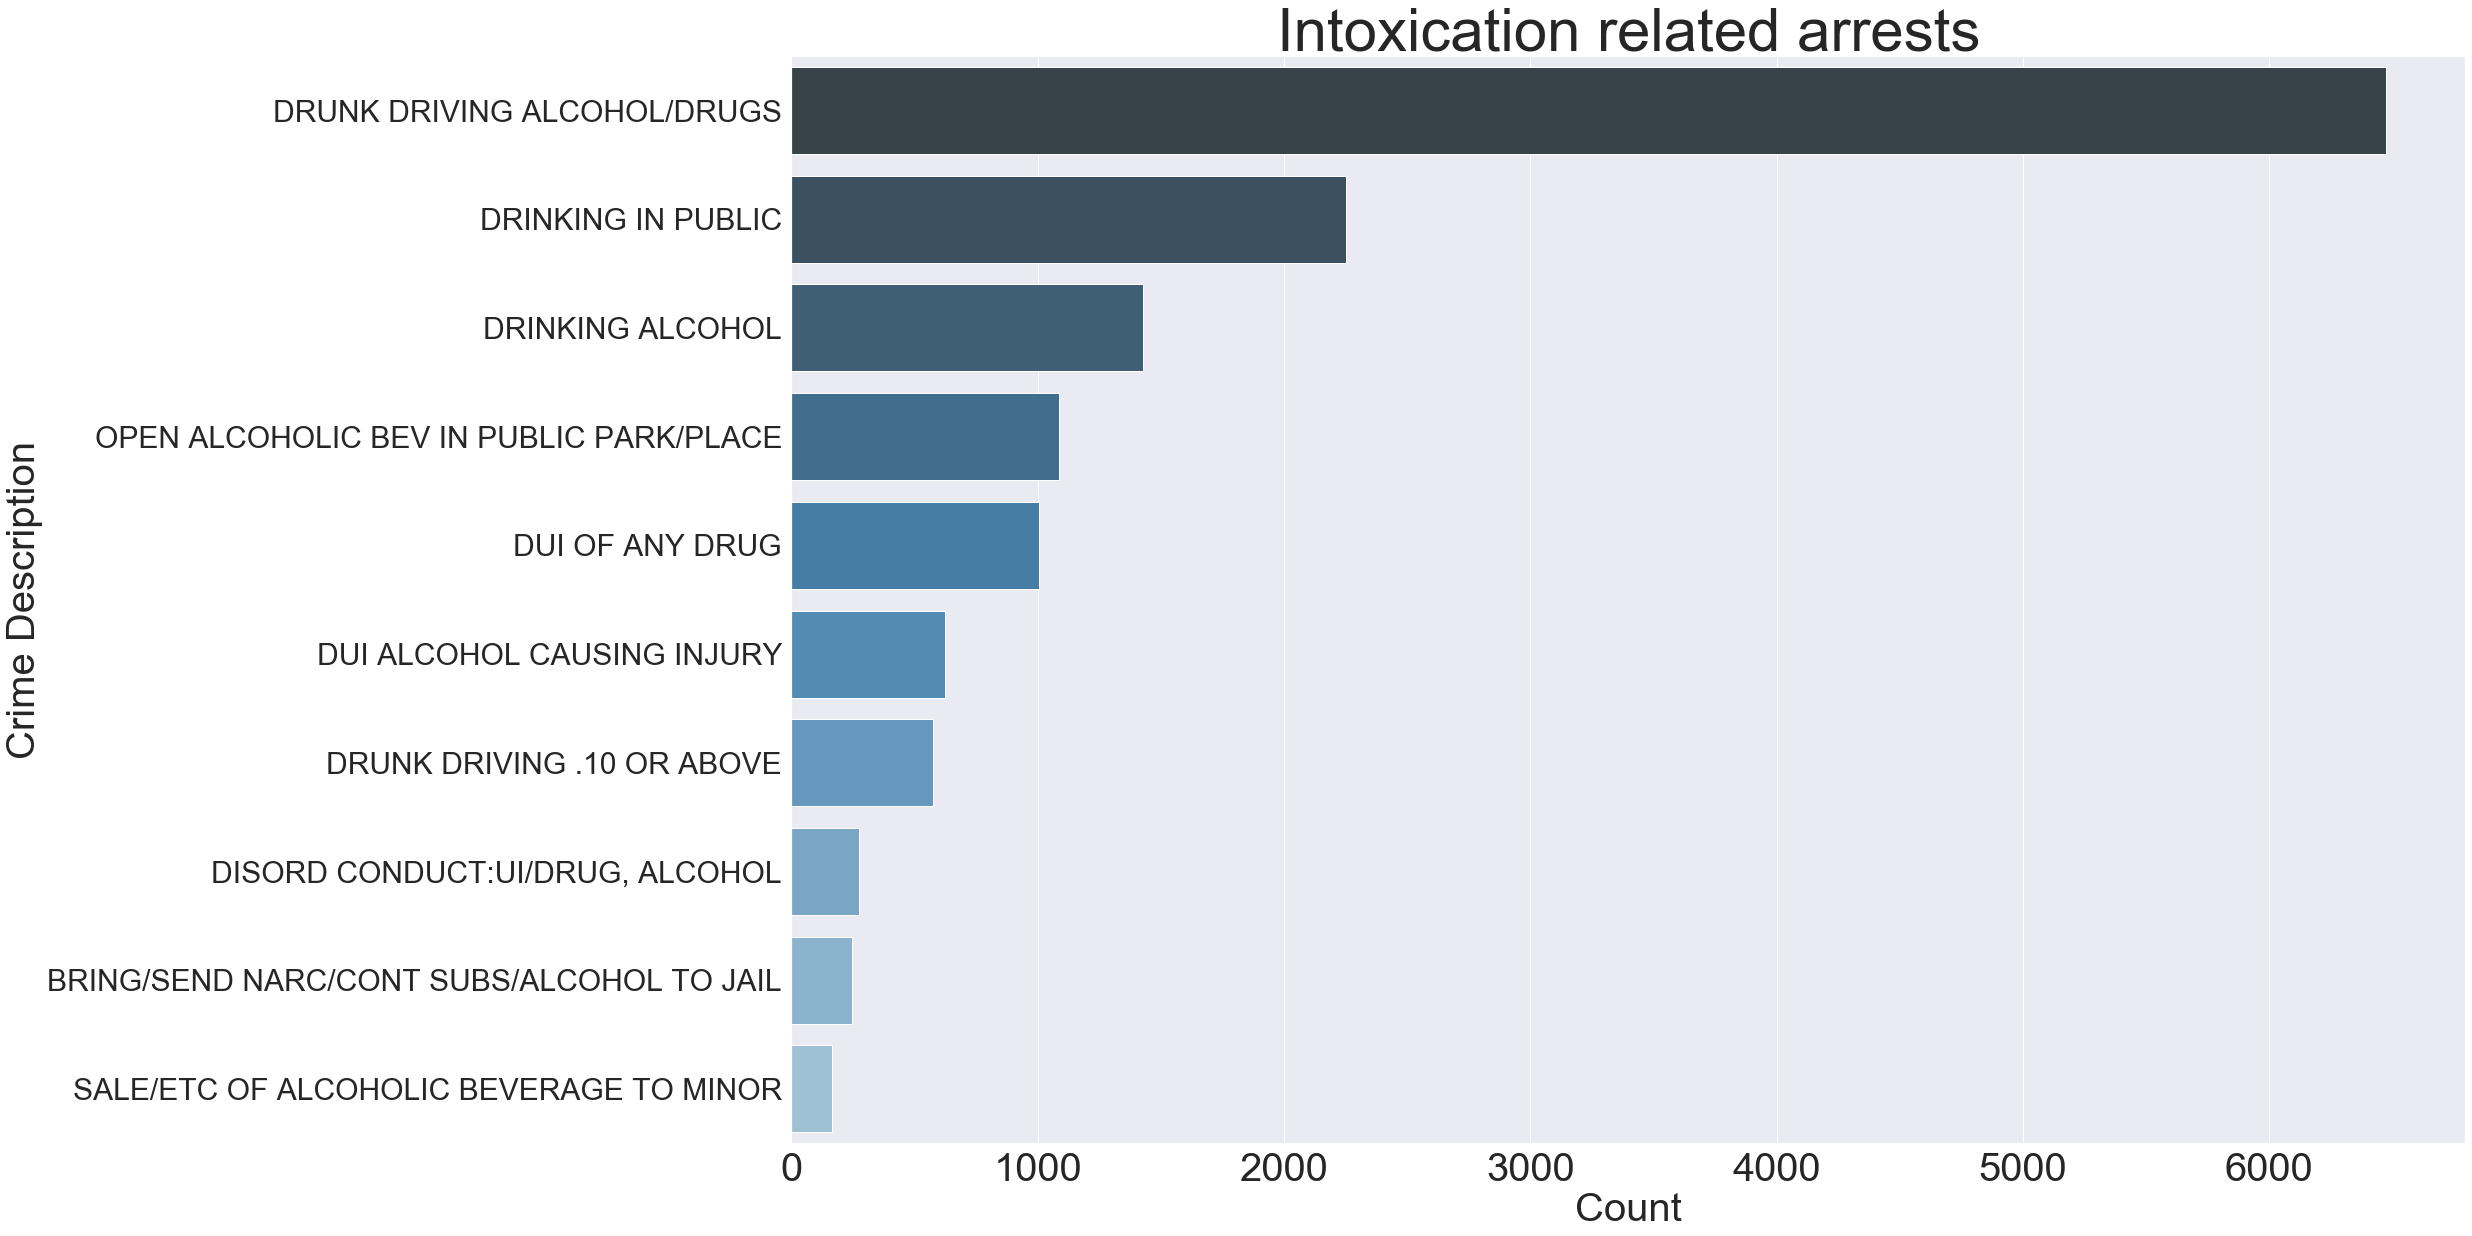

In [347]:

plt.figure(figsize=(30,20))
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
sns.countplot(y=df1['Charge Description'],order=df1['Charge Description'].value_counts().index[:10] ,palette='Blues_d').set_title("Intoxication related arrests",fontsize=60)
plt.xlabel('Count',fontsize=40)
plt.ylabel('Crime Description',fontsize=40)

# Save the Figure

plt.savefig("Charge Description.png", bbox_inches='tight')
